In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:


from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Training_final/Training_final/Social Determinants of Health.csv')

In [ ]:
df

,rwjf_premature_death_rate,rwjf_poor_health_pct,rwjf_uninsured_adults_pct,rwjf_pcp_rate,rwjf_preventable_ip_rate,rwjf_adult_smoking_pct,rwjf_adult_obesity_pct,rwjf_teen_births_rate,rwjf_homicides_rate,rwjf_high_school_pct,...,rwjf_disconnect_youth_pct,rwjf_home_ownership_pct,rwjf_housing_cost_burden_pct,rwjf_flu_vax,rwjf_suicides_rate,rwjf_broadband_access,rwjf_diabetes_monitor_pct,rwjf_healthcare_cost,rwjf_drug_deaths_modl_rate,id
0,8671.084,0.216076,0.197464,0.000265,52.68,0.195525,0.398,24.084312,10.428421,0.870000,...,0.075730,0.676266,0.159998,0.49,14.443182,0.855341,0.863121,9750.99,6.0,1352611
1,7439.620,0.193420,0.072883,0.000603,32.74,0.196184,0.311,14.443236,NaN,0.970000,...,NaN,0.707001,0.109818,0.55,24.068380,0.833414,0.881720,8749.57,11.0,299881
2,8363.172,0.211875,0.090306,0.000797,33.49,0.218531,0.348,22.917480,3.817668,0.940000,...,0.078956,0.645821,0.120681,0.56,14.110594,0.840763,0.896078,9544.74,12.0,1191826
3,10805.334,0.281196,0.092180,0.000284,55.07,0.281043,0.330,45.366043,6.421520,0.930000,...,NaN,0.783335,0.081525,0.37,16.813110,0.685470,0.890449,10177.70,12.0,1772108
4,14181.182,0.313580,0.088424,0.000586,107.71,0.289167,0.407,57.787067,6.553408,0.970000,...,0.157454,0.699067,0.147324,0.34,19.058668,0.719067,0.821641,13539.30,15.0,171691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527899,6027.820,0.198544,0.094016,0.000574,38.86,0.241388,0.375,13.393764,NaN,0.765619,...,0.063163,0.733426,0.139688,0.37,14.887681,0.770939,0.844130,8706.94,5.0,376551
1527900,9694.119,0.180898,0.217170,0.000462,38.55,0.202963,0.287,31.518625,NaN,0.940000,...,NaN,0.790354,0.093154,0.48,21.691614,0.832148,0.858362,9921.92,15.0,1637412
1527901,7256.559,0.177475,0.155202,0.000421,41.52,0.205468,0.376,20.225464,NaN,0.870000,...,NaN,0.797562,0.091311,0.58,17.806608,0.835111,0.921171,9944.39,9.0,338186
1527902,9736.558,0.219709,0.204958,0.001307,71.80,0.211616,0.343,28.938050,5.891138,0.923548,...,0.093761,0.610443,0.123964,0.50,18.880125,0.777853,0.871505,10394.01,10.0,351507


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527904 entries, 0 to 1527903
Data columns (total 78 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   rwjf_premature_death_rate       1526764 non-null  float64
 1   rwjf_poor_health_pct            1526922 non-null  float64
 2   rwjf_uninsured_adults_pct       1526922 non-null  float64
 3   rwjf_pcp_rate                   1518072 non-null  float64
 4   rwjf_preventable_ip_rate        1525874 non-null  float64
 5   rwjf_adult_smoking_pct          1526922 non-null  float64
 6   rwjf_adult_obesity_pct          1526922 non-null  float64
 7   rwjf_teen_births_rate           1525077 non-null  float64
 8   rwjf_homicides_rate             1215323 non-null  float64
 9   rwjf_high_school_pct            1496741 non-null  float64
 10  rwjf_unemploy_pct               1526922 non-null  float64
 11  rwjf_child_poverty_pct          1526922 non-null  float64
 12  

In [ ]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]]
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [ ]:

merged_df = pd.merge(df, target[['id', 'preventive_visit_gap_ind']], on='id', how='left')


In [ ]:
vif_cal(input_data=merged_df, dependent_col='preventive_visit_gap_ind')

rwjf_premature_death_rate  VIF =  133.41
rwjf_poor_health_pct  VIF =  52.97
rwjf_uninsured_adults_pct  VIF =  2015.42
rwjf_pcp_rate  VIF =  5.42
rwjf_preventable_ip_rate  VIF =  2.97
rwjf_adult_smoking_pct  VIF =  19.09
rwjf_adult_obesity_pct  VIF =  5.37
rwjf_teen_births_rate  VIF =  11.38
rwjf_homicides_rate  VIF =  16.73
rwjf_high_school_pct  VIF =  2.25
rwjf_unemploy_pct  VIF =  3.09
rwjf_child_poverty_pct  VIF =  11.44
rwjf_poor_phy_hlth_days  VIF =  50.45
rwjf_low_birthweight_pct  VIF =  7.24
rwjf_mv_deaths_rate  VIF =  11.34
rwjf_poor_men_hlth_days  VIF =  27.69
rwjf_violent_crime_rate  VIF =  3.8
rwjf_income_inequ_ratio  VIF =  4.7
rwjf_std_infect_rate  VIF =  7.43
rwjf_alcoholic_pct  VIF =  3.67
rwjf_mammography_pct  VIF =  3.51
rwjf_population  VIF =  3.22
rwjf_age_lt_18_pct  VIF =  15.76
rwjf_age_gt_65_pct  VIF =  19.92
rwjf_african_race_pct  VIF =  578.37
rwjf_native_race_pct  VIF =  98.41
rwjf_hispanic_pct  VIF =  534.09
rwjf_female_pct  VIF =  3.48
rwjf_rural_pct  VIF =  

In [ ]:

merged_df = merged_df.drop(columns=['rwjf_homicides_rate', 'rwjf_hiv_rate', 'rwjf_child_mortality', 'rwjf_disconnect_youth_pct', 'rwjf_infant_mortality', 'rwjf_child_free_lunch_pct', 'rwjf_some_college_pct', 'rwjf_single_parent_pct', 'rwjf_child_poverty_pct', 'rwjf_age_lt_18_pct', 'rwjf_uninsured_child_pct', 'rwjf_teen_births_rate', 'rwjf_inactivity_pct'], axis=1)


In [ ]:
merged_df.shape

(1527904, 66)

In [ ]:
merged_df['rwjf_asian_race_pct'].corr(target['preventive_visit_gap_ind'])

0.0006527818053904972

In [ ]:
pd.crosstab(index=merged_df['rwjf_asian_race_pct'], columns=merged_df['preventive_visit_gap_ind'])

preventive_visit_gap_ind,0,1
rwjf_asian_race_pct,,
0.000000,0,2
0.000603,230,170
0.000632,24,20
0.000723,131,141
0.000741,2,2
...,...,...
0.309878,494,1012
0.323330,43,61
0.359787,5,21


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


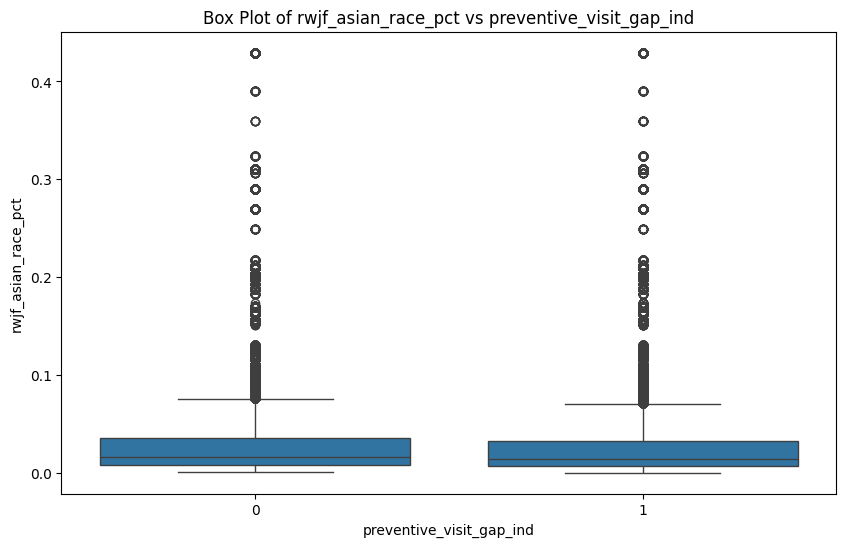

In [ ]:
# prompt: box plot between rwjf_asian_race_pct and preventive_visit_gap_ind

plt.figure(figsize=(10, 6))
sns.boxplot(x='preventive_visit_gap_ind', y='rwjf_asian_race_pct', data=merged_df)
plt.title('Box Plot of rwjf_asian_race_pct vs preventive_visit_gap_ind')
plt.xlabel('preventive_visit_gap_ind')
plt.ylabel('rwjf_asian_race_pct')
plt.show()


In [ ]:
merged_df['rwjf_asian_race_pct'].isnull().sum()

982

In [ ]:
merged_df = merged_df.drop(columns=[ 'rwjf_premature_death_rate', 'rwjf_poor_health_pct', 'rwjf_uninsured_adults_pct', 'rwjf_adult_smoking_pct', 'rwjf_poor_phy_hlth_days', 'rwjf_poor_men_hlth_days', 'rwjf_african_race_pct', 'rwjf_native_race_pct', 'rwjf_hispanic_pct', 'rwjf_asian_race_pct', 'rwjf_limit_hlthy_food_pct', 'rwjf_uninsured_pct', 'rwjf_white_race_pct', 'rwjf_premature_mortality', 'rwjf_food_env_inx', 'rwjf_food_insecurity_pct', 'rwjf_physical_distress_pct', 'rwjf_mental_distress_pct','rwjf_life_expectancy'], axis=1)
#df = df.drop(columns=[ 'rwjf_premature_death_rate', 'rwjf_poor_health_pct', 'rwjf_uninsured_adults_pct', 'rwjf_adult_smoking_pct', 'rwjf_poor_phy_hlth_days', 'rwjf_poor_men_hlth_days', 'rwjf_african_race_pct', 'rwjf_native_race_pct', 'rwjf_hispanic_pct', 'rwjf_asian_race_pct', 'rwjf_limit_hlthy_food_pct', 'rwjf_uninsured_pct', 'rwjf_white_race_pct', 'rwjf_premature_mortality', ], axis=1)


In [ ]:
merged_df.shape

(1527904, 47)

In [ ]:
vif_cal(input_data=merged_df, dependent_col='preventive_visit_gap_ind')

rwjf_pcp_rate  VIF =  4.1
rwjf_preventable_ip_rate  VIF =  2.07
rwjf_adult_obesity_pct  VIF =  3.72
rwjf_high_school_pct  VIF =  1.67
rwjf_unemploy_pct  VIF =  1.96
rwjf_low_birthweight_pct  VIF =  3.82
rwjf_mv_deaths_rate  VIF =  6.36
rwjf_violent_crime_rate  VIF =  2.86
rwjf_income_inequ_ratio  VIF =  3.2
rwjf_std_infect_rate  VIF =  5.48
rwjf_alcoholic_pct  VIF =  2.8
rwjf_mammography_pct  VIF =  2.75
rwjf_population  VIF =  2.45
rwjf_age_gt_65_pct  VIF =  4.5
rwjf_female_pct  VIF =  1.78
rwjf_rural_pct  VIF =  6.45
rwjf_non_english_pct  VIF =  3.58
rwjf_diabetes_pct  VIF =  3.34
rwjf_men_hlth_prov_ratio  VIF =  2.55
rwjf_median_house_income  VIF =  7.18
rwjf_drive_alone_pct  VIF =  3.03
rwjf_hawaiian_race_pct  VIF =  1.43
rwjf_dentists_ratio  VIF =  3.18
rwjf_drinkwater_violate_ind  VIF =  1.21
rwjf_air_pollute_density  VIF =  1.72
rwjf_other_pcp  VIF =  3.14
rwjf_exercise_access_pct  VIF =  4.0
rwjf_dui_deaths_pct  VIF =  1.22
rwjf_injury_deaths_rate  VIF =  13.9
rwjf_severe_housi

In [ ]:
merged_df = merged_df.drop(columns=['rwjf_mv_deaths_rate', 'rwjf_std_infect_rate', 'rwjf_rural_pct', 'rwjf_injury_deaths_rate', 'rwjf_severe_housing_pct', 'rwjf_housing_cost_burden_pct'], axis=1)

In [ ]:
vif_cal(input_data=merged_df, dependent_col='preventive_visit_gap_ind')

rwjf_pcp_rate  VIF =  3.96
rwjf_preventable_ip_rate  VIF =  2.02
rwjf_adult_obesity_pct  VIF =  3.68
rwjf_high_school_pct  VIF =  1.61
rwjf_unemploy_pct  VIF =  1.89
rwjf_low_birthweight_pct  VIF =  3.5
rwjf_violent_crime_rate  VIF =  2.58
rwjf_income_inequ_ratio  VIF =  2.71
rwjf_alcoholic_pct  VIF =  2.69
rwjf_mammography_pct  VIF =  2.69
rwjf_population  VIF =  2.42
rwjf_age_gt_65_pct  VIF =  3.71
rwjf_female_pct  VIF =  1.67
rwjf_non_english_pct  VIF =  2.63
rwjf_diabetes_pct  VIF =  3.32
rwjf_men_hlth_prov_ratio  VIF =  2.44
rwjf_median_house_income  VIF =  6.74
rwjf_drive_alone_pct  VIF =  2.9
rwjf_hawaiian_race_pct  VIF =  1.42
rwjf_dentists_ratio  VIF =  3.09
rwjf_drinkwater_violate_ind  VIF =  1.18
rwjf_air_pollute_density  VIF =  1.59
rwjf_other_pcp  VIF =  3.06
rwjf_exercise_access_pct  VIF =  3.33
rwjf_dui_deaths_pct  VIF =  1.17
rwjf_long_commute_alone_pct  VIF =  3.22
rwjf_drug_overdose_deaths_rate  VIF =  2.41
rwjf_social_associate_rate  VIF =  2.02
rwjf_resident_seg_bla

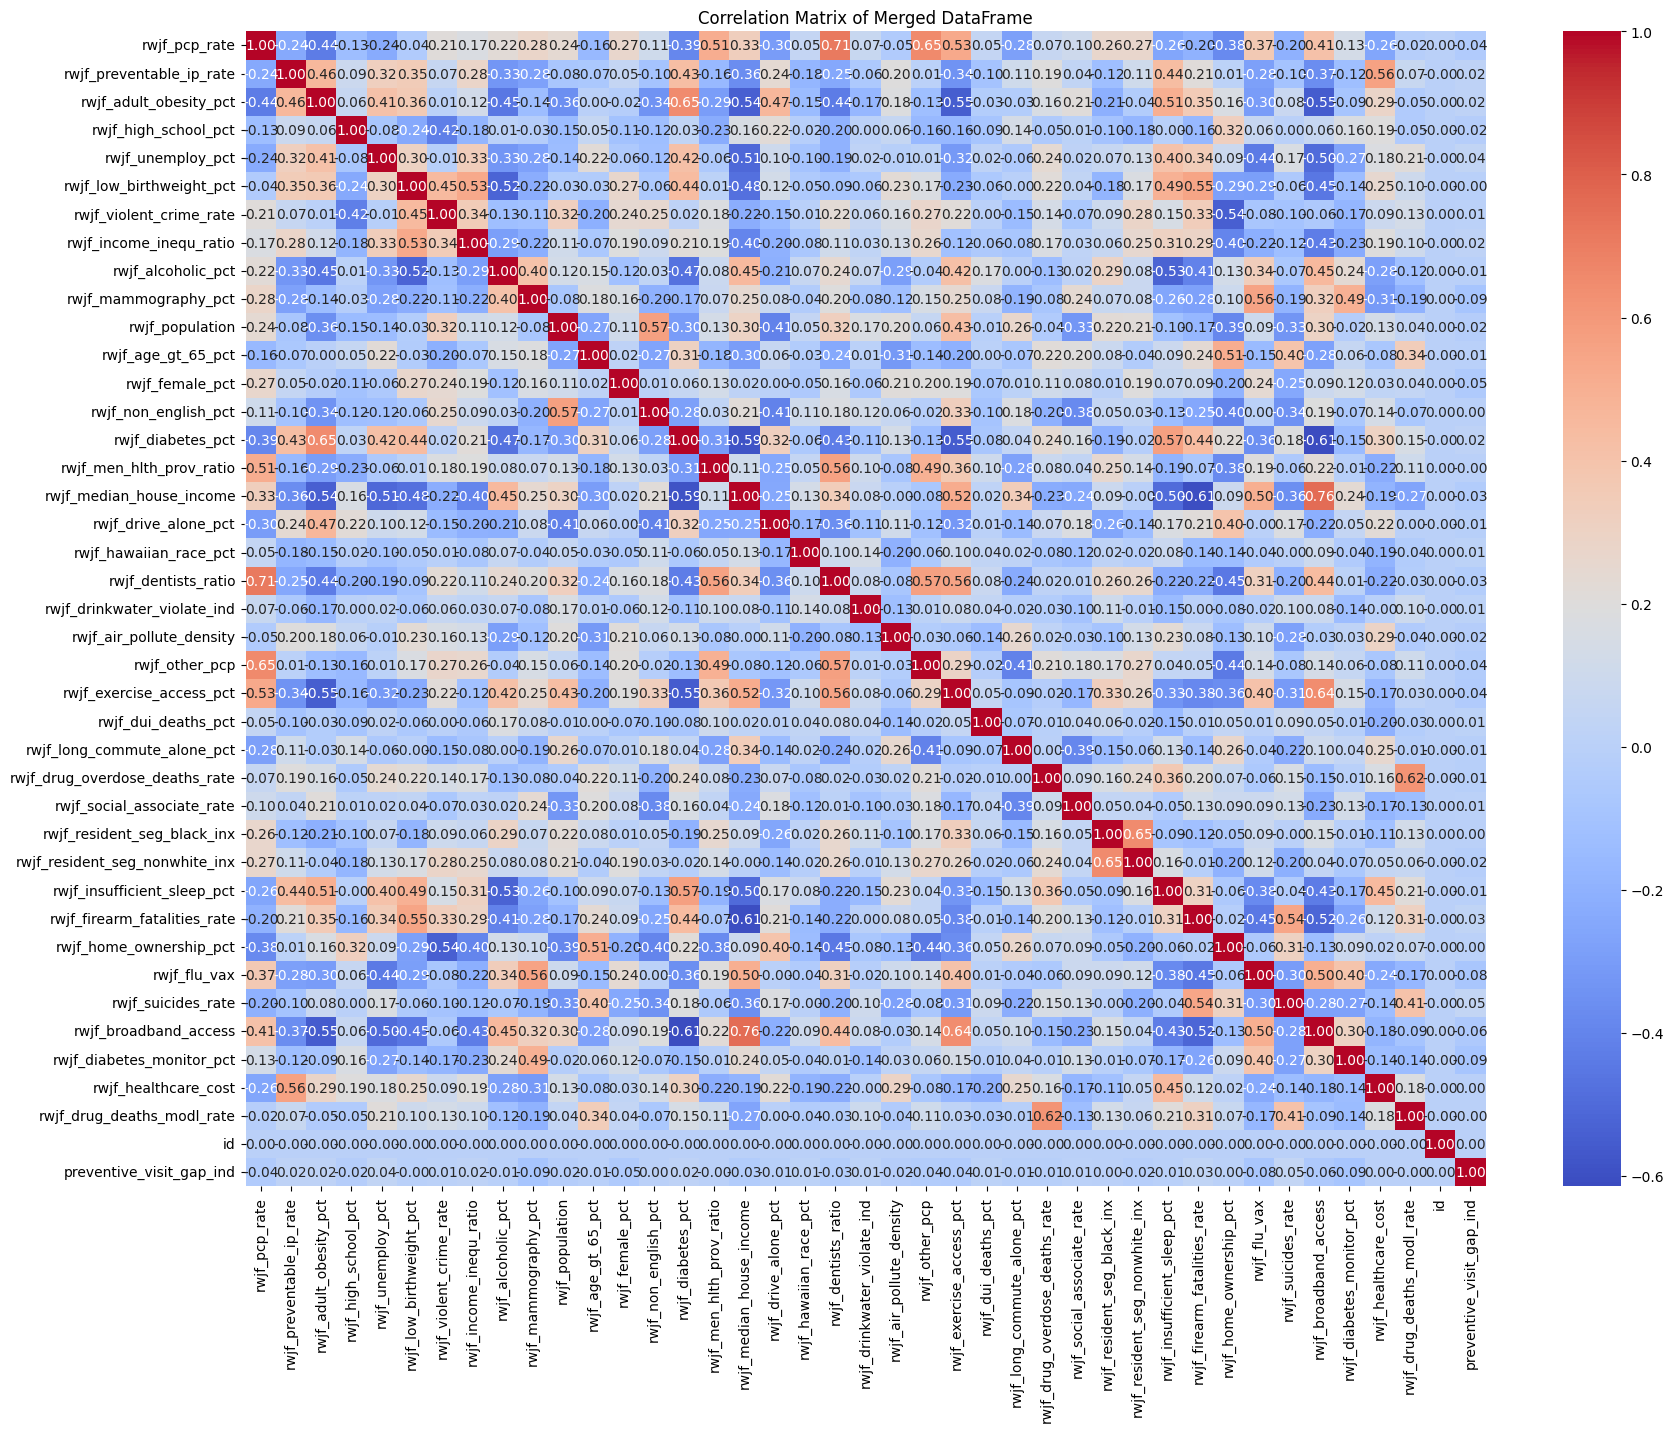

In [ ]:
# prompt: create correlation plot for merged_df

plt.figure(figsize=(20, 15))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Merged DataFrame')
plt.show()


In [ ]:
# prompt: save merged_df file as csv

merged_df.to_csv('final_social.csv', index=False)


In [ ]:
merged_df.shape

(1527904, 41)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
rwjf_infant_mortality,333978
rwjf_disconnect_youth_pct,325332
rwjf_homicides_rate,312581
rwjf_drug_overdose_deaths_rate,155499
rwjf_child_mortality,138136
...,...
rwjf_hawaiian_race_pct,982
rwjf_poor_health_pct,982
rwjf_single_parent_pct,982
rwjf_uninsured_pct,982


In [ ]:
df.shape

(1527904, 78)

In [ ]:
# prompt: help m to store data whose column has more than 50k null values

null_counts = df.isnull().sum()
columns_with_many_nulls = null_counts[null_counts > 50000].index.tolist()
df_many_nulls = df[columns_with_many_nulls]
print(df_many_nulls)


         rwjf_homicides_rate  rwjf_hiv_rate  rwjf_child_mortality  \
0                  10.428421          412.1             63.916225   
1                        NaN            NaN             42.564060   
2                   3.817668            NaN             40.511604   
3                   6.421520            NaN             65.166390   
4                   6.553408            NaN             53.659924   
...                      ...            ...                   ...   
1527899                  NaN           52.7             40.409065   
1527900                  NaN          147.9             58.383934   
1527901                  NaN           95.7             58.234657   
1527902             5.891138          272.5             64.990860   
1527903             4.860438          175.1             56.201878   

         rwjf_infant_mortality  rwjf_drug_overdose_deaths_rate  \
0                     7.517205                       12.448272   
1                          NaN         

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
rwjf_drug_overdose_deaths_rate,155499
rwjf_resident_seg_black_inx,119593
rwjf_firearm_fatalities_rate,56761
rwjf_suicides_rate,48952
rwjf_violent_crime_rate,38718
...,...
rwjf_inactivity_pct,982
rwjf_poor_health_pct,982
rwjf_asian_race_pct,982
rwjf_single_parent_pct,982


In [ ]:
null_counts = df.isnull().sum()
columns_with_many_nulls = null_counts[null_counts > 5000].index.tolist()
df_many_nulls = df[columns_with_many_nulls]
print(df_many_nulls)


         rwjf_pcp_rate  rwjf_high_school_pct  rwjf_mv_deaths_rate  \
0             0.000265              0.870000            17.915493   
1             0.000603              0.970000            13.706892   
2             0.000797              0.940000            14.452601   
3             0.000284              0.930000            27.437405   
4             0.000586              0.970000            23.900665   
...                ...                   ...                  ...   
1527899       0.000574              0.765619            10.562067   
1527900       0.000462              0.940000            22.963430   
1527901       0.000421              0.870000            13.229802   
1527902       0.001307              0.923548            15.022401   
1527903       0.001042              0.760366             7.786621   

         rwjf_violent_crime_rate  rwjf_men_hlth_prov_ratio  \
0                     396.490660                  0.000975   
1                      77.969670               

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
rwjf_drug_overdose_deaths_rate,155499
rwjf_resident_seg_black_inx,119593
rwjf_firearm_fatalities_rate,56761
rwjf_suicides_rate,48952
rwjf_violent_crime_rate,38718
...,...
rwjf_median_house_income,982
rwjf_drive_alone_pct,982
rwjf_hawaiian_race_pct,982
rwjf_asian_race_pct,982


In [ ]:
df['rwjf_drug_overdose_deaths_rate']

,rwjf_drug_overdose_deaths_rate
0,12.448272
1,28.881773
2,43.367820
3,29.871418
4,36.210020
...,...
1527899,NaN
1527900,14.198312
1527901,17.182802
1527902,16.664513


In [ ]:
target = pd.read_csv('/content/drive/MyDrive/Training_final/Training_final/humana_mays_target_members.csv')

In [ ]:
target

,calendar_year,product_type,plan_category,preventive_visit_gap_ind,id
0,2023,LPPO,Medicare Advantage,0,380667
1,2023,LPPO,Medicare Advantage,0,378860
2,2023,LPPO,Medicare Advantage,1,1370287
3,2023,LPPO,Medicare Advantage,0,184540
4,2023,LPPO,Medicare Advantage,0,1628837
...,...,...,...,...,...
1527899,2023,LPPO,Medicare Advantage,1,1065218
1527900,2023,LPPO,Medicare Advantage,1,1597708
1527901,2023,LPPO,Medicare Advantage,1,328428
1527902,2023,LPPO,Medicare Advantage,1,286064


In [ ]:
# prompt: correlation between two features

correlation = df['rwjf_drug_overdose_deaths_rate'].cov(target['preventive_visit_gap_ind'])
print(f"Correlation between rwjf_premature_death_rate and rwjf_drug_overdose_deaths_rate: {correlation}")


Correlation between rwjf_premature_death_rate and rwjf_drug_overdose_deaths_rate: -0.0011928170645292436


In [ ]:
id = df['id']
df = df.drop('id', axis=1)
feature_col = df.columns.tolist()  # Get the column names as a list
coveriance = pd.DataFrame(columns=['name', 'variance'])  # Initialize empty DataFrame

i = 0  # Start index at 0
for feature_col in df:
    coveriance.loc[i, 'name'] = feature_col  # Set the column name
    coveriance.loc[i, 'variance'] = df[feature_col].cov(target['preventive_visit_gap_ind'])  # Set the covariance value
    i += 1  # Increment index


In [ ]:
coveriance

,name,variance
0,rwjf_premature_death_rate,-0.699414
1,rwjf_poor_health_pct,-0.00003
2,rwjf_uninsured_adults_pct,-0.000043
3,rwjf_pcp_rate,-0.0
4,rwjf_preventable_ip_rate,-0.006427
...,...,...
58,rwjf_suicides_rate,0.001821
59,rwjf_broadband_access,0.00003
60,rwjf_diabetes_monitor_pct,-0.000004
61,rwjf_healthcare_cost,0.178577


In [ ]:
# prompt: Using dataframe coveriance: plot graph

import altair as alt

alt.Chart(coveriance).mark_bar().encode(
    x='name',
    y='variance'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# prompt: plot only higher variance graph

# Filter the DataFrame to include only rows where variance is greater than a threshold (e.g., 0)
coveriance_filtered = coveriance[coveriance['variance'] < 0]

# Create the Altair chart with the filtered data
alt.Chart(coveriance_filtered).mark_bar().encode(
    x='name',
    y='variance'
)


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:

negative_variance_columns = coveriance_filtered['name'].tolist()
df = df.drop(columns=negative_variance_columns)


In [ ]:
df.shape

(1527904, 27)

In [ ]:
feature_col = df.columns.tolist()  # Get the column names as a list
coveriance = pd.DataFrame(columns=['name', 'variance'])  # Initialize empty DataFrame

i = 0  # Start index at 0
for feature_col in df:
    coveriance.loc[i, 'name'] = feature_col  # Set the column name
    coveriance.loc[i, 'variance'] = df[feature_col].cov(target['preventive_visit_gap_ind'])  # Set the covariance value
    i += 1  # Increment index


In [ ]:
coveriance


,name,variance
0,rwjf_alcoholic_pct,0.00003
1,rwjf_mammography_pct,0.000016
2,rwjf_population,29.136389
3,rwjf_age_gt_65_pct,0.000006
4,rwjf_men_hlth_prov_ratio,0.0
5,rwjf_median_house_income,9.850357
6,rwjf_drive_alone_pct,0.000046
7,rwjf_hawaiian_race_pct,0.0
8,rwjf_asian_race_pct,0.000013
9,rwjf_dentists_ratio,0.0


In [ ]:
# prompt: drop variance equal to 0

# Filter the DataFrame to include only rows where variance is not equal to 0
coveriance_filtered = coveriance[coveriance['variance'] != 0.0]

# Create the Altair chart with the filtered data
alt.Chart(coveriance_filtered).mark_bar().encode(
    x='name',
    y='variance'
)

# Get the column names with variance equal to 0
zero_variance_columns = coveriance[coveriance['variance'] == 0]['name'].tolist()

# Drop the columns with variance equal to 0 from the DataFrame
df = df.drop(columns=zero_variance_columns)

df.shape


(1527904, 27)

In [ ]:
feature_col = df.columns.tolist()  # Get the column names as a list
coveriance = pd.DataFrame(columns=['name', 'variance'])  # Initialize empty DataFrame

i = 0  # Start index at 0
for feature_col in df:
    coveriance.loc[i, 'name'] = feature_col  # Set the column name
    coveriance.loc[i, 'variance'] = df[feature_col].cov(target['preventive_visit_gap_ind'])  # Set the covariance value
    i += 1  # Increment index


In [ ]:
coveriance

,name,variance
0,rwjf_alcoholic_pct,0.00003
1,rwjf_mammography_pct,0.000016
2,rwjf_population,29.136389
3,rwjf_age_gt_65_pct,0.000006
4,rwjf_men_hlth_prov_ratio,0.0
5,rwjf_median_house_income,9.850357
6,rwjf_drive_alone_pct,0.000046
7,rwjf_hawaiian_race_pct,0.0
8,rwjf_asian_race_pct,0.000013
9,rwjf_dentists_ratio,0.0


In [ ]:
df = df.drop(columns=['rwjf_alcoholic_pct', 'rwjf_mammography_pct', 'rwjf_men_hlth_prov_ratio', 'rwjf_hawaiian_race_pct', 'rwjf_dentists_ratio', 'rwjf_other_pcp', 'rwjf_broadband_access'], axis=1)

In [ ]:
feature_col = df.columns.tolist()  # Get the column names as a list
coveriance = pd.DataFrame(columns=['name', 'variance'])  # Initialize empty DataFrame

i = 0  # Start index at 0
for feature_col in df:
    coveriance.loc[i, 'name'] = feature_col  # Set the column name
    coveriance.loc[i, 'variance'] = df[feature_col].cov(target['preventive_visit_gap_ind'])  # Set the covariance value
    i += 1  # Increment index


In [ ]:
coveriance

,name,variance
0,rwjf_population,29.136389
1,rwjf_age_gt_65_pct,0.000006
2,rwjf_median_house_income,9.850357
3,rwjf_drive_alone_pct,0.000046
4,rwjf_asian_race_pct,0.000013
5,rwjf_drinkwater_violate_ind,0.000158
6,rwjf_white_race_pct,0.000147
7,rwjf_exercise_access_pct,0.00014
8,rwjf_food_env_inx,0.00058
9,rwjf_dui_deaths_pct,0.000009


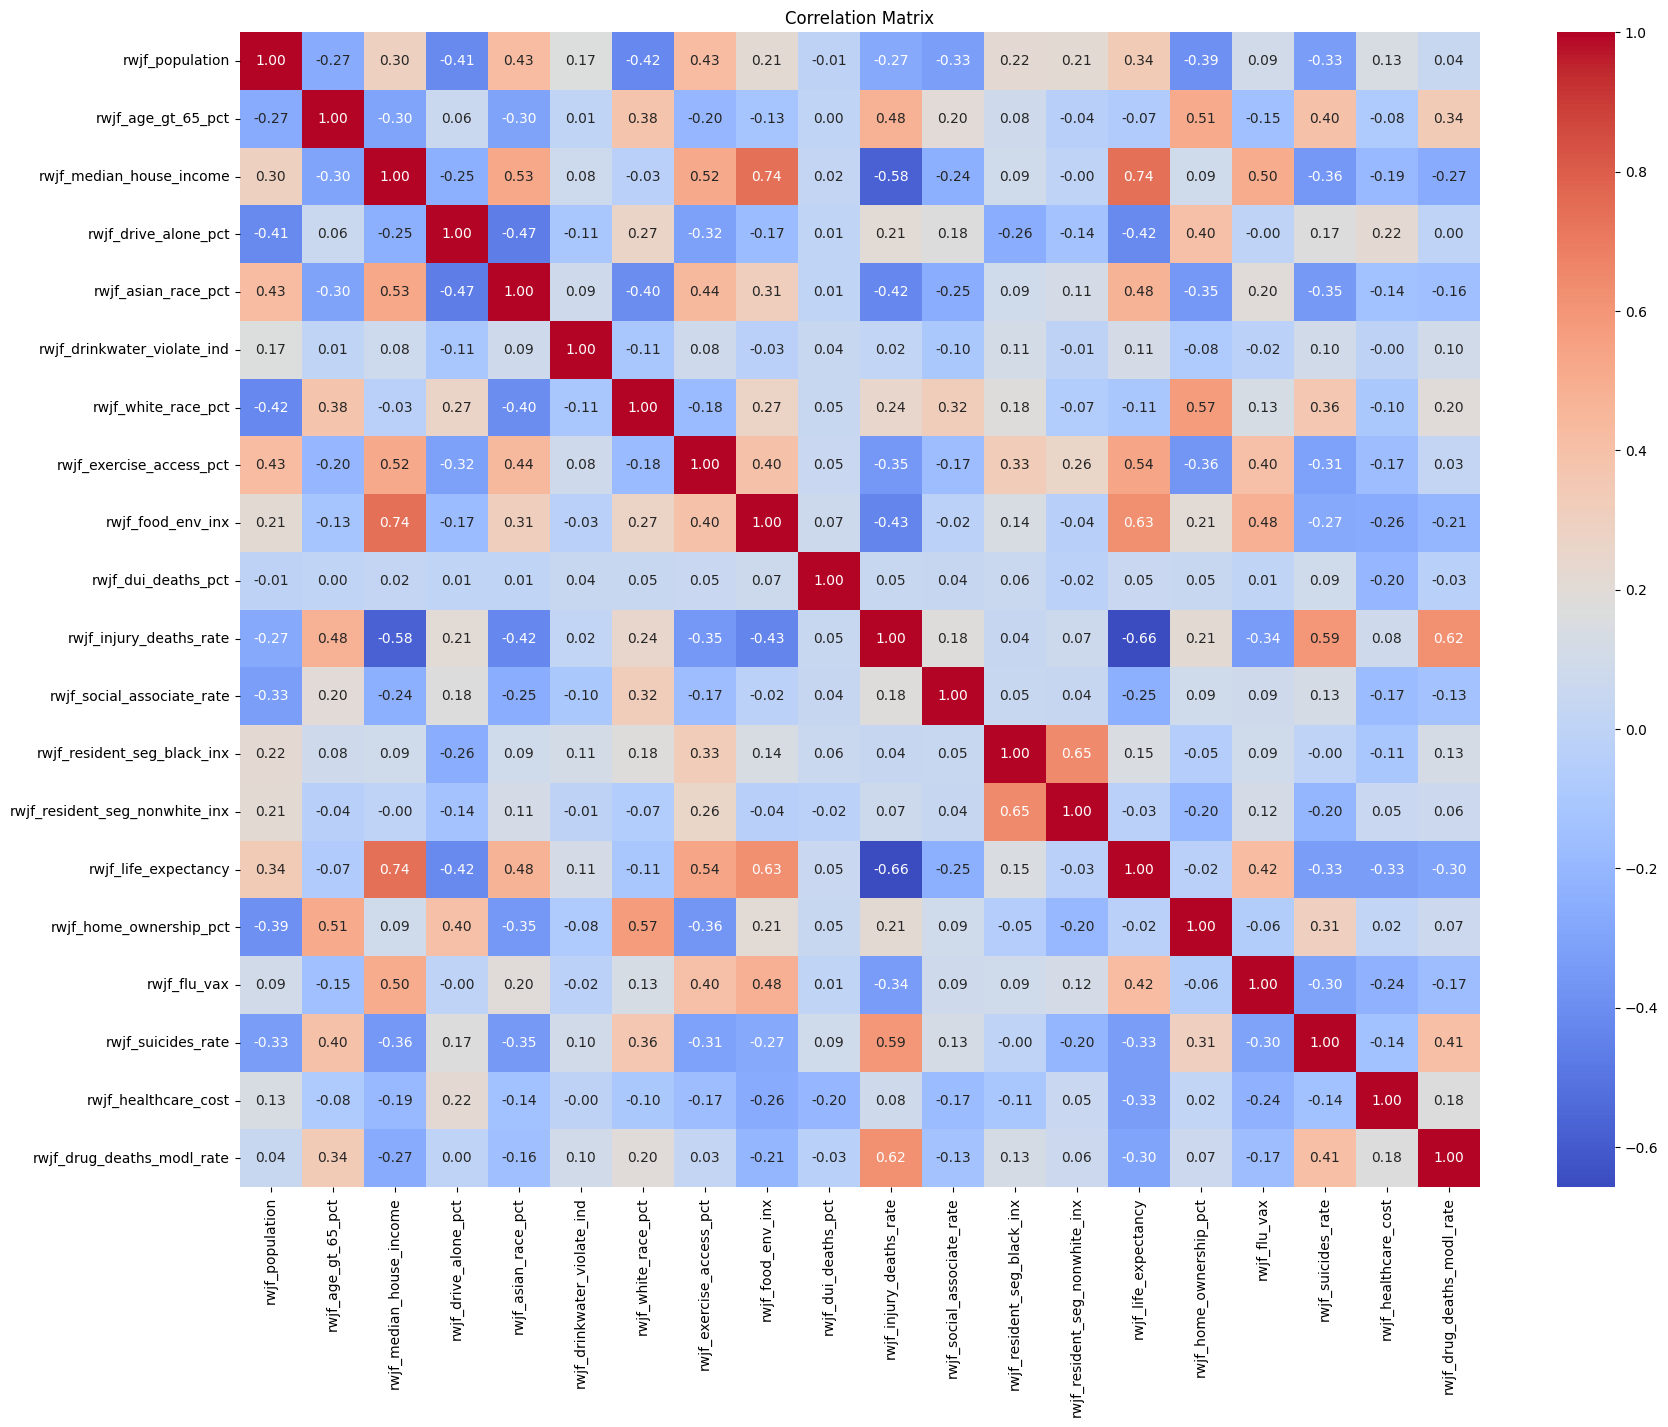

In [ ]:
# prompt: plot correlation plot

correlation_matrix = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
